Bishoy sameh,
Shireen Talaat,
Amr Abd El Latief,
Ahmed Mahmoud Yassin,
Alsawy Mohamed

#Review These
Overview on Decision Trees: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

More on Encoding: https://pbpython.com/categorical-encoding.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np


In [ ]:
# Run this cell to download the dataset
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00544/ObesityDataSet_raw_and_data_sinthetic%20(2).zip"
!unzip "/content/ObesityDataSet_raw_and_data_sinthetic (2).zip" 

--2022-04-18 20:21:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/00544/ObesityDataSet_raw_and_data_sinthetic%20(2).zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119205 (116K) [application/x-httpd-php]
Saving to: ‘ObesityDataSet_raw_and_data_sinthetic (2).zip’

ObesityDataSet_raw_ 100%[===================>] 116.41K   261KB/s    in 0.4s    

2022-04-18 20:21:20 (261 KB/s) - ‘ObesityDataSet_raw_and_data_sinthetic (2).zip’ saved [119205/119205]

Archive:  /content/ObesityDataSet_raw_and_data_sinthetic (2).zip
  inflating: ObesityDataSet_raw_and_data_sinthetic.arff  
  inflating: ObesityDataSet_raw_and_data_sinthetic.csv  


In [ ]:
#import dataset as a pandas dataframe - name it df - using the .read_csv method
dataset = 'ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(dataset)


In [ ]:
#view first 5 rows of the dataset using the .head() method
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#check for the total amount of null values in each column using the .isnull() method
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Number of Columns

In [ ]:
df.shape[1]

17

Are there any new features that could be derived from our old features?


In [ ]:
#create a function that takes your df as an input then calculates the BMI using the equation: BMI= Weight/ Height**2
df['BMI'] = (df.Weight/df.Height**2)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [ ]:
# apply the function to every row in the dataframe, create a new column, 'BMI' that contains those values. HINT: You can use .apply and lambda


SyntaxError: ignored

In [ ]:
#check your dataframe

Drop old features, i.e: height and weight

In [ ]:
#use .drop() method to your dataframe, don't forget to set inplace=True
df.drop(columns=['Height', 'Weight'],inplace=True)

In [ ]:
#check your dataframe
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [ ]:
#check your columns' data types using the .dtypes method
df.dtypes

Gender                             object
Age                               float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
BMI                               float64
dtype: object

Check the unique values in your target label

In [ ]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

Create two Dataframes of Features X and Output Y

In [ ]:
X = df.drop(['NObeyesdad'], axis=1)
X.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,24.386526
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,24.238227
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,23.765432
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,26.851852
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,28.342381


In [ ]:
y = df['NObeyesdad']
y = y.to_frame()


Change column name to something that makes sense

In [ ]:
#replace newcolumname
y.rename(columns= {'NObeyesdad': 'body_types'}, inplace= True)
y.head()

,body_types
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II


Encode your Catgorical Features

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
X_encoded = pd.get_dummies(X)
X_encoded =X_encoded.fillna(0.0)
X_encoded.head()

,Age,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender_Female,Gender_Male,family_history_with_overweight_no,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,2.0,3.0,2.0,0.0,1.0,24.386526,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,21.0,3.0,3.0,3.0,3.0,0.0,24.238227,1,0,0,...,1,0,0,1,0,0,0,0,1,0
2,23.0,2.0,3.0,2.0,2.0,1.0,23.765432,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,27.0,3.0,3.0,2.0,2.0,0.0,26.851852,0,1,1,...,0,0,1,0,0,0,0,0,0,1
4,22.0,2.0,1.0,2.0,0.0,0.0,28.342381,0,1,1,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder 
#initialize label encoder
le = LabelEncoder()
# fit the data to your initialized label encoder
y.body_types = le.fit_transform(y['body_types'])
le.classes_

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

In [ ]:
y.head()

,body_types
0,1
1,1
2,1
3,5
4,6


*Perform* label encoding to y

In [ ]:
# run this cell to check your label column - y
y.columns

Index(['body_types'], dtype='object')

In [ ]:
y.head()

,body_types
0,1
1,1
2,1
3,5
4,6


# New Section

In [ ]:
#check unique values for y
y['body_types'].unique()

array([1, 5, 6, 2, 0, 3, 4])

Normalize so that no feature has more weight over the other, you can use MinMaxScaler

In [ ]:
#import scaler - you can use MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
# Create a list of your numerical features
numerical = ['Age','FCVC','NCP','CH2O','FAF','TUE','BMI']

X_encoded[numerical] = scaler.fit_transform(X_encoded[numerical])

# Show an example of a record with scaling applied
display(X_encoded.head(n = 1))

,Age,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender_Female,Gender_Male,family_history_with_overweight_no,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.148936,0.5,0.666667,0.5,0.0,0.5,0.301162,1,0,0,...,0,0,0,0,1,0,0,0,1,0


Shuffle and split the data using train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1688 samples.
Testing set has 423 samples.


Training, Prediction and Evaluation


In [ ]:
# Let's use Decision Tree Classifier

# import Decision Tree Classifier from Sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# initilize the classifier
classifier = DecisionTreeClassifier()

# fit your classifier to the data using the .fit() method
classifier.fit(X_train,y_train)
# predict train set values
y_pred_train = classifier.predict(X_train)

# predict test set values
y_pred_test = classifier.predict(X_test)


In [ ]:
# import accuracy_score from sklearn
# check accuracy on training set
acc_train = accuracy_score(y_pred_train,y_train)
# check accuracy on testing set
acc = accuracy_score(y_pred_test,y_test)

print(acc_train)

print(acc)





1.0
0.9692671394799054


[Text(0.5473872950819673, 0.9545454545454546, 'X[6] <= 0.449\ngini = 0.856\nsamples = 1688\nvalue = [216, 225, 273, 239, 261, 234, 240]'),
 Text(0.24231557377049182, 0.8636363636363636, 'X[6] <= 0.315\ngini = 0.75\nsamples = 914\nvalue = [216, 225, 1, 0, 0, 234, 238]'),
 Text(0.10655737704918032, 0.7727272727272727, 'X[6] <= 0.145\ngini = 0.513\nsamples = 447\nvalue = [216, 225, 0, 0, 0, 6, 0]'),
 Text(0.09016393442622951, 0.6818181818181818, 'gini = 0.0\nsamples = 214\nvalue = [214, 0, 0, 0, 0, 0, 0]'),
 Text(0.12295081967213115, 0.6818181818181818, 'X[20] <= 0.5\ngini = 0.067\nsamples = 233\nvalue = [2, 225, 0, 0, 0, 6, 0]'),
 Text(0.08196721311475409, 0.5909090909090909, 'X[0] <= 0.556\ngini = 0.029\nsamples = 202\nvalue = [2, 199, 0, 0, 0, 1, 0]'),
 Text(0.04918032786885246, 0.5, 'X[6] <= 0.162\ngini = 0.02\nsamples = 200\nvalue = [2, 198, 0, 0, 0, 0, 0]'),
 Text(0.03278688524590164, 0.4090909090909091, 'X[14] <= 0.5\ngini = 0.245\nsamples = 14\nvalue = [2, 12, 0, 0, 0, 0, 0]'),
 T

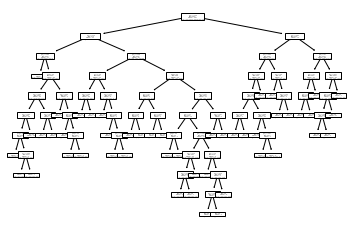

In [ ]:
import sklearn.tree as tree
# visualize your tree
tree.plot_tree(classifier)

In [ ]:
# check the hyperparameters used
classifier.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

**Awesome progress if you've come this far! **

Extra credit - Why don't we play with the hyperparameters we discussed earlier to see how our model changes?

check the documentation and choose the hyperparameters you like: 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [ ]:
# check your tree's depth
classifier.get_depth()

10

In [ ]:
# Let's use Decision Tree Classifier

# import Decision Tree Classifier from Sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# initilize the classifier
classifier2 = DecisionTreeClassifier(min_samples_split=4,max_depth = 6, min_samples_leaf = 5 )

# fit your classifier to the data using the .fit() method
classifier2.fit(X_train,y_train)
# predict train set values
y_pred_train = classifier2.predict(X_train)

# predict test set values
y_pred_test = classifier2.predict(X_test)


In [ ]:
# import accuracy_score from sklearn
# check accuracy on training set
acc_train = accuracy_score(y_pred_train,y_train)
# check accuracy on testing set
acc = accuracy_score(y_pred_test,y_test)

print(acc_train)

print(acc)



0.981042654028436
0.9574468085106383


[Text(0.5420673076923077, 0.9285714285714286, 'X[6] <= 0.449\ngini = 0.856\nsamples = 1688\nvalue = [216, 225, 273, 239, 261, 234, 240]'),
 Text(0.24278846153846154, 0.7857142857142857, 'X[6] <= 0.315\ngini = 0.75\nsamples = 914\nvalue = [216, 225, 1, 0, 0, 234, 238]'),
 Text(0.10576923076923077, 0.6428571428571429, 'X[6] <= 0.145\ngini = 0.513\nsamples = 447\nvalue = [216, 225, 0, 0, 0, 6, 0]'),
 Text(0.08653846153846154, 0.5, 'gini = 0.0\nsamples = 214\nvalue = [214, 0, 0, 0, 0, 0, 0]'),
 Text(0.125, 0.5, 'X[20] <= 0.5\ngini = 0.067\nsamples = 233\nvalue = [2, 225, 0, 0, 0, 6, 0]'),
 Text(0.07692307692307693, 0.35714285714285715, 'X[6] <= 0.162\ngini = 0.029\nsamples = 202\nvalue = [2, 199, 0, 0, 0, 1, 0]'),
 Text(0.038461538461538464, 0.21428571428571427, 'X[15] <= 0.5\ngini = 0.245\nsamples = 14\nvalue = [2, 12, 0, 0, 0, 0, 0]'),
 Text(0.019230769230769232, 0.07142857142857142, 'gini = 0.48\nsamples = 5\nvalue = [2, 3, 0, 0, 0, 0, 0]'),
 Text(0.057692307692307696, 0.071428571428571

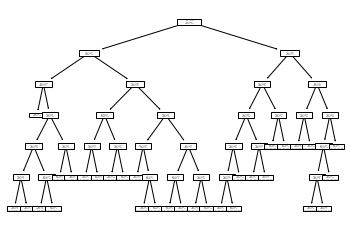

In [ ]:
tree.plot_tree(classifier2)

In [ ]:
## fit your classifier to the data using the .fit() method
# predict train set values
# predict test set values

In [ ]:
# initialize your classifier again but this time with the hyperparamers you want

In [ ]:
# check accuracy on training set
# check accuracy on testing set

In [ ]:
# check the hyperparameters used
classifier2.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# check the hyperparameters used
classifier2.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Reflect on your results - let's discuss!

In [75]:
parameters = { 'min_samples_split': [2], 'max_depth' : [3,4,5,6,7,8,9,10,11,12,13,14,15], 'min_samples_leaf' : [1] }

In [76]:
from sklearn.model_selection import GridSearchCV

best_classifier = GridSearchCV(classifier2, parameters)



In [77]:
# fit your classifier to the data using the .fit() method
best_classifier.fit(X_train,y_train)
# predict train set values
y_pred_train = best_classifier.predict(X_train)

# predict test set values
y_pred_test = best_classifier.predict(X_test)


In [78]:
# import accuracy_score from sklearn
# check accuracy on training set
acc_train = accuracy_score(y_pred_train,y_train)
# check accuracy on testing set
acc = accuracy_score(y_pred_test,y_test)

print(acc_train)

print(acc)


1.0
0.9716312056737588


In [79]:
# check the hyperparameters used
best_classifier.get_params(deep=True)

{'cv': None,
 'error_score': nan,
 'estimator': DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=4),
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': 6,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 5,
 'estimator__min_samples_split': 4,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'n_jobs': None,
 'param_grid': {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
  'min_samples_leaf': [1],
  'min_samples_split': [2]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

AttributeError: ignored

AttributeError: ignored

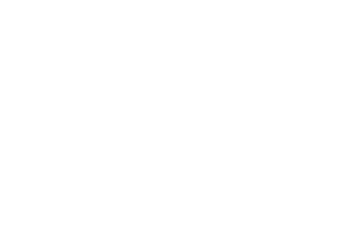